<img src='./data/k_t.jpg'>
<center><h1>A framework for deep learning</h1></center>


# Overview


## Keras


<p>
Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

Use Keras if you need a deep learning library that:
<ul>
    <li>
        Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
    </li>
    <li>
        Supports both convolutional networks and recurrent networks, as well as combinations of the two.
    </li>
    <li>
        Runs seamlessly on CPU and GPU.
    </li>
</ul>
</p>

<p>
    <h3>Guiding principles</h3>
<ul>
    <li>
        <b>User friendliness</b>. Keras is an API designed for human beings, not machines. It puts user experience front and center. Keras follows best practices for reducing cognitive load: it offers consistent & simple APIs, it minimizes the number of user actions required for common use cases, and it provides clear and actionable feedback upon user error.
    </li>
    <li>
      <b>Modularity</b>. A model is understood as a sequence or a graph of standalone, fully-configurable modules that can be plugged together with as few restrictions as possible. In particular, neural layers, cost functions, optimizers, initialization schemes, activation functions, regularization schemes are all standalone modules that you can combine to create new models.
</li><li>
    <b>Easy extensibility</b>. New modules are simple to add (as new classes and functions), and existing modules provide ample examples. To be able to easily create new modules allows for total expressiveness, making Keras suitable for advanced research.
</li><li>
    <b>Work with Python</b>. No separate models configuration files in a declarative format. Models are described in Python code, which is compact, easier to debug, and allows for ease of extensibility.
</li></ul>
</p>

## Tensorflow

<p>TensorFlow™ is an open source software library for <b>high performance numerical computation</b>. Its flexible architecture allows easy deployment of computation across a variety of platforms (CPUs, GPUs, TPUs), and from desktops to clusters of servers to mobile and edge devices. Originally developed by researchers and engineers from the Google Brain team within Google’s AI organization, it comes with strong support for machine learning and deep learning and the flexible numerical computation core is used across many other scientific domains.</p>


# Getting Started

## Installation

        


The <a href='https://www.tensorflow.org/install/' target='_blank' style="color:#ff6e4a;font-weight:bold; text-decoration:none;">Tensorflow</a> installation guide has detailed instructions, but for those who want to quick and easy version...
<br><br>
    Open anaconda prompt and run:
    <br>
    $ pip install tensorflow==1.11
    

Likewise, the <a href='https://keras.io/#installation' target='_blank' style="color:red;font-weight:bold; text-decoration:none;">Keras</a> installation guide has detailed instructions, but for those who want to quick and easy version...
<br><br>
    Open anaconda prompt and run:
    <br>
    $ pip install keras
    

<p>Keras is configured to use Tensorflow as the backend by default, <br>so for now we will only look at Keras</p>

<p>For the first example, we will build a simple densely connected neural network for a regression task

# First Model

## Data
<p><b>MNIST</b><br>
    Classification of handwritten digits
    
   <img src='./data/mnist.png'/>
   

In [27]:
#If the data isn't already in keras/datasets it will download automatically 
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [28]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Label:  8


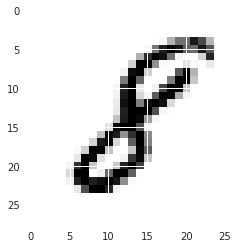

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 7777 
print('Label: ',y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys');

## One Hot Encoding
<p>
    We will use the Keras utility to_categorical to one hot encode the labels

In [30]:
from keras.utils.np_utils import to_categorical
help(to_categorical)

Help on function to_categorical in module keras.utils.np_utils:

to_categorical(y, num_classes=None, dtype='float32')
    Converts a class vector (integers) to binary class matrix.
    
    E.g. for use with categorical_crossentropy.
    
    # Arguments
        y: class vector to be converted into a matrix
            (integers from 0 to num_classes).
        num_classes: total number of classes.
        dtype: The data type expected by the input, as a string
            (`float32`, `float64`, `int32`...)
    
    # Returns
        A binary matrix representation of the input. The classes axis
        is placed last.



In [31]:
#This is the label corresponding to index 7777
y_train[7777]

8

In [32]:
y_train = to_categorical(y_train)

In [33]:
#This is the label representation now
y_train[7777]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

## Building the Model

<p>For this example, we will build a densely connected neural network to classify the digits. The input layer will be a flattened representation of the pixel values. The output layer will be an array of probabilities corresponding to the labels<br><br> The image illustrates the architecture of the model, though we are going to do it a little differently
    
   <img src='./data/basic_dense_nn.png'>
   
   
  

In [34]:
from keras.models import Sequential

#get an instance of a Sequential Model
model = Sequential()

from keras.layers import Dense, Flatten

#add some layers to the model
model.add(Flatten(input_shape=(28,28))) #Each image is 28x28 pixels. 
                                        #This layer autmatically flattens to 1d row, 
                                        #but does not have any parameters to learn
        
model.add(Dense(units=128, activation='sigmoid', input_dim=(784)))#This is the 'input' layer

model.add(Dense(units=128, activation='sigmoid', input_dim=128))#This is a hidden layer

model.add(Dense(units=10, activation='softmax', input_dim = 128))#This is the output layer

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_41 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_121 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_122 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_123 (Dense)            (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model.fit(x_train, y_train, epochs=5, batch_size=500, validation_split=0.4) 

Train on 36000 samples, validate on 24000 samples
Epoch 1/5
36000/36000 [==============================] - 2s 50us/step - loss: 2.2671 - acc: 0.1852 - val_loss: 2.1928 - val_acc: 0.3355
Epoch 2/5
36000/36000 [==============================] - 1s 19us/step - loss: 2.1334 - acc: 0.4194 - val_loss: 2.0800 - val_acc: 0.4943
Epoch 3/5
36000/36000 [==============================] - 1s 18us/step - loss: 2.0276 - acc: 0.5376 - val_loss: 1.9791 - val_acc: 0.5695
Epoch 4/5
36000/36000 [==============================] - 1s 17us/step - loss: 1.9298 - acc: 0.6031 - val_loss: 1.8842 - val_acc: 0.6308
Epoch 5/5
36000/36000 [==============================] - 1s 18us/step - loss: 1.8352 - acc: 0.6529 - val_loss: 1.7885 - val_acc: 0.6710


## Model Evaluation

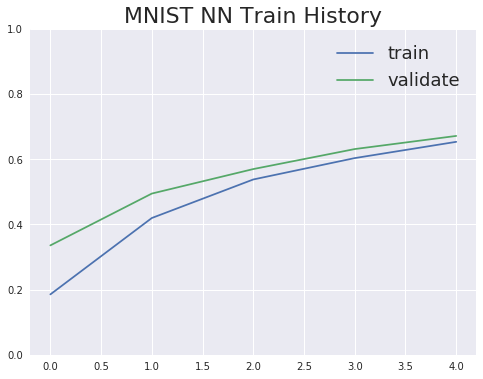

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig,ax = plt.subplots(figsize=(8,6))
ax.set_title('MNIST NN Train History', fontsize=22)
ax.plot(range(len(history.history['acc'])), history.history['acc'], label='train')
ax.plot(range(len(history.history['acc'])), history.history['val_acc'], label='validate')
ax.legend(fontsize=18)
ax.set_ylim([0,1])
plt.show()

<p>Now we can classify images from the test set that have not yet been seen by the neural network 

In [37]:
pred = model.predict(x_test)
print(pred[0])

[0.08202358 0.07146173 0.07853314 0.11459566 0.08688799 0.07155532
 0.0717948  0.23310107 0.07115496 0.11889173]


<p>It's interesting to see the probabilities, but not really useful yet, so we will extract the index of the highest probability, which corresponds to the class

In [38]:
import numpy as np
predictions = [np.argmax(p) for p in pred]

In [39]:
predictions[0]

7

<p>It would take a while to hand-check all of them, so we will use accuracy_score from sklearn to calculate a model accuracy

In [40]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predictions)
print('{:.2%}'.format(acc))

67.66%


<hr>We can also see how well individual labels are predicted with a confusion matrix
<br><br>
Read sklearn's confusion matrix:<br>
<b>column</b> => <b>predicted class</b><br>
    <b>row</b> => <b>true class</b><br>
    (This is backwards from other implementations, but will be demonstrated in the next notebook)

In [41]:
import pandas as pd
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, predictions), columns=[0,1,2,3,4,5,6,7,8,9])

,0,1,2,3,4,5,6,7,8,9
0,938,2,3,4,0,4,14,12,0,3
1,0,1117,4,3,0,0,2,2,6,1
2,86,214,566,46,26,0,41,29,23,1
3,55,70,14,767,3,3,11,49,15,23
4,24,43,10,11,556,2,67,22,11,236
5,123,61,17,235,20,201,49,62,18,106
6,55,25,26,1,15,1,830,4,1,0
7,6,70,13,12,11,0,1,882,10,23
8,62,139,6,256,24,11,33,37,323,83
9,32,21,24,36,130,5,6,159,10,586


## Improvements

### Grid Search CV

<p>One of the easiest improvements to make is to find a good ratio between batch size and epochs. <br><br>
The <b>batch size</b> is the number of training examples that contribute to each parameter update <br><br>
<b>Epochs</b> refers to the number of iterations over the entire (training) dataset<br><br>
    <hr>
Rather than guess and check over and over, we can employ a grid search in which all combinations of parameters entered are 
tested
    


First, we have to write a function to return a compiled model

In [42]:
def build_model():
    '''
    Returns a compiled model    
    '''
    from keras.models import Sequential
    from keras.layers import Dense, Flatten

    #get an instance of a Sequential Model
    model = Sequential()

    #add some layers to the model
    model.add(Flatten(input_shape=(28,28))) 
    model.add(Dense(units=128, activation='sigmoid', input_dim=(784)))
    model.add(Dense(units=128, activation='sigmoid', input_dim=128))
    model.add(Dense(units=10, activation='softmax', input_dim = 128))
    
    #compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])

    return model
    

Next, we have to define a dictionary of parameters to try

In [43]:
# grid search epochs, batch size
epochs = [1, 10, 25]
batch_size = [50, 100, 500, 1000]
param_grid = dict(epochs=epochs, batch_size=batch_size)
param_grid

{'epochs': [1, 10, 25], 'batch_size': [50, 100, 500, 1000]}

<p>Now we can use SciKit-Learn GridSearchCV to iterate over combinations of parameters

In [44]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# create model
model = KerasClassifier(build_fn=build_model, verbose=0) # use verbose=0 if you do not want to see progress

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(x_train, y_train) 

In [45]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.939150 using {'batch_size': 50, 'epochs': 25}
0.780283 (0.018610) with: {'batch_size': 50, 'epochs': 1}
0.919633 (0.004460) with: {'batch_size': 50, 'epochs': 10}
0.939150 (0.001728) with: {'batch_size': 50, 'epochs': 25}
0.672167 (0.016967) with: {'batch_size': 100, 'epochs': 1}
0.902683 (0.003021) with: {'batch_size': 100, 'epochs': 10}
0.928967 (0.002311) with: {'batch_size': 100, 'epochs': 25}
0.371233 (0.029196) with: {'batch_size': 500, 'epochs': 1}
0.788683 (0.006920) with: {'batch_size': 500, 'epochs': 10}
0.870667 (0.003411) with: {'batch_size': 500, 'epochs': 25}
0.187517 (0.018480) with: {'batch_size': 1000, 'epochs': 1}
0.686300 (0.011576) with: {'batch_size': 1000, 'epochs': 10}
0.815083 (0.008107) with: {'batch_size': 1000, 'epochs': 25}


## Exercise
<p>
    Keras provides a wide variety of <a href="https://keras.io/activations/" target=_blank>Activation Functions</a>, <a href="https://keras.io/losses/" target=_blank>Losses</a>, 
<a href="https://keras.io/metrics/" target=_blank>Metrics</a> & <a href="https://keras.io/optimizers/" target=_blank>Optimizers</a>
    
   <div> <img  src='./data/saddle_point_evaluation_optimizers.gif'>
    </div>
    
<br><p >Experiment with a few of them on the previous examples to build a better classification model 

## Solution

In [61]:
def build_model():
    '''
    Returns a compiled model    
    '''
    from keras.models import Sequential
    from keras.layers import Dense, Flatten

    #get an instance of a Sequential Model
    model = Sequential()

    #add some layers to the model
    model.add(Flatten(input_shape=(28,28))) 
    model.add(Dense(units=128, activation='sigmoid', input_dim=(784)))
    model.add(Dense(units=128, activation='sigmoid', input_dim=128))
    model.add(Dense(units=10, activation='softmax', input_dim = 128))
    
    #compile the model
    model.compile(loss='categorical_hinge',
                  optimizer='Adagrad',
                  metrics=['accuracy'])

    return model
    

In [62]:
model = build_model()
history = model.fit(x_train, y_train, epochs=25, batch_size=50, validation_split=.4, verbose=0)

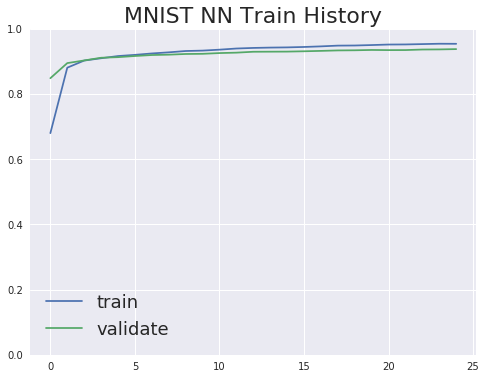

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig,ax = plt.subplots(figsize=(8,6))
ax.set_title('MNIST NN Train History', fontsize=22)
ax.plot(range(len(history.history['acc'])), history.history['acc'], label='train')
ax.plot(range(len(history.history['acc'])), history.history['val_acc'], label='validate')
ax.legend(fontsize=18)
ax.set_ylim([0,1])
plt.show()

In [64]:
pred = model.predict(x_test)
predictions = [np.argmax(p) for p in pred]
print('{:.2%}'.format(accuracy_score(y_test, predictions)))

93.88%


In [65]:
pd.DataFrame(confusion_matrix(y_test, predictions), columns=[0,1,2,3,4,5,6,7,8,9])

,0,1,2,3,4,5,6,7,8,9
0,966,0,1,1,0,3,4,2,3,0
1,0,1110,5,4,2,2,4,1,7,0
2,8,1,958,7,7,3,11,15,20,2
3,1,0,22,929,1,18,0,9,20,10
4,2,1,6,0,923,0,10,5,7,28
5,11,2,3,23,8,806,15,4,15,5
6,8,3,5,1,3,13,921,2,2,0
7,2,7,24,6,7,2,1,962,1,16
8,6,3,7,13,10,14,10,8,898,5
9,8,5,0,12,33,9,1,12,14,915
